In [21]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

In [71]:
data = pd.read_csv('resources/wine.data', header=None)
X = pd.read_csv('resources/wine.data', header=None, usecols=list(xrange(1,14)))
y = pd.read_csv('resources/wine.data', header=None, usecols=[0]).values.reshape(len(X),)

In [72]:
data.columns= ["Class", "Alcohol", "MalicAcid", "Ash", "AlcalinityAsh","Magnesium","TotalPhenols", "Flavanoids", "NonflavanoidPhenols", "Proanthocyanins", "ColorIntensity", "Hue", "OD280DilutedWines", "Proline"]

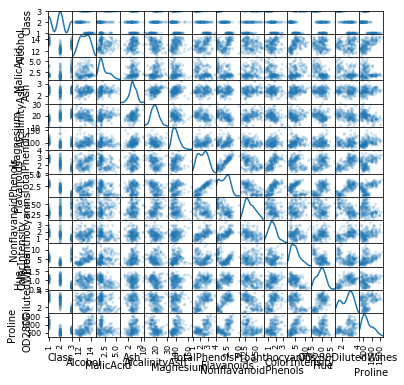

In [73]:
plt_sm = pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [74]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

kMeans = list()
for i in range(1, 51, 1):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    array = cross_val_score(estimator=classifier, X=X, y=y, cv=kf, scoring='accuracy')
    kMeans.append((i, array.mean()))
    
print(max(kMeans, key = lambda t: t[1]))
    

(1, 0.7304761904761905)


In [104]:
from sklearn.preprocessing import scale

X_scaled = scale(X)
kMeans = list()
for i in range(1, 51, 1):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_scaled, y)
    array = cross_val_score(estimator=classifier, X=X_scaled, y=y, cv=kf, scoring='accuracy')
    kMeans.append((i, array.mean()))
    
print(max(kMeans, key = lambda t: t[1]))


(29, 0.9776190476190475)
